Skrypty i opis działań modeli MLP i CART
Jan Łukaszewicz 308187 
Dominik Sobieraj 308208

In [96]:
#%pip install pandas
import pandas as pd
import math

Obliczenie `AVG_ID_SUM` - wynik będzie stosowany jako ziarno generatora liczb losowych.

In [97]:
AVG_ID_SUM = math.floor((308187 + 308208) / 2)
AVG_ID_SUM

308197

Utworzenie zmiennej `analysis_data` - dane, służące do eksploracyjnej analizy danych, w celu wykluczenia możliwie niepotrzebnych kolumn.

In [98]:
analysis_data = pd.read_csv('heart-data.csv')


Można zauważyć, że dane nie zawierają pustych pomiarów.

In [99]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Wiedząć, że pomiary nie są "puste", należy przeanalizować unikalne wartości w każdej kolumnie, które mogą świadczyć o tym, że dany pomiar nie został wykonany, dla przykładu, jeżeli w kolumnie `Age`, wartość wynosiłaby `-1`, wtedy należałoby zastanowić się co zrobić z danym wierszem, aby nie zakłócił on działania modelu.

Patrząć na wynik, poniższego kodu, można zauważyć podejrzane `0` w kolumnie `RestingBP` oraz `Cholesterol`.

In [100]:
for col in analysis_data.columns:
    print(col, ' : ', analysis_data[col].unique(), '\n')

Age  :  [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] 

Sex  :  ['M' 'F'] 

ChestPainType  :  ['ATA' 'NAP' 'ASY' 'TA'] 

RestingBP  :  [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] 

Cholesterol  :  [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222

Wiersze, z błędnymi pomiarami `Cholesterol` zostają usunięte, ponieważ błędny pomiar, tej wartości, może świadczyć o innych niepoprawnych wartościach w danym wierszu, dlatego w przyszłości kolumna `Cholesterol`, nie będzię predyktorem. <br>
Wyselekcjonowane pomiary z `analisys_data` zostają skopiowane do zmiennej `data` czyli danych, które posłużą do podziału na predyktory oraz zmienną celu. Podział na dwie zmienne jest spowodowany, niezbędną przeróbką danych, aby można było je przeanalizować.

In [101]:
analysis_data = analysis_data[analysis_data['Cholesterol'] != 0]
analysis_data = analysis_data[analysis_data['RestingBP'] != 0]
analysis_data.reset_index(drop=True, inplace=True)
data = analysis_data.copy()


In [102]:
#%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


Encodowanie, kolumn kategorycznych oraz utworzenie macierzy korelacji, w celu sprawdzenia "więzi" poszczególnych kolumn ze zmienną celu. <br>
Można zauważyć, że zmienna `Cholesterol`, ma niską "więź" ze zmienną celu, dlatego jest to kolejny argument, by ta kolumna nie była predyktorem. <br>
Dodatkowo zmienna `RestingECG` również prawie wogóle nie wpływa na `HeartDisease`, dlatego można nie brać jej pod uwagę podczas tworzenia predyktorów.

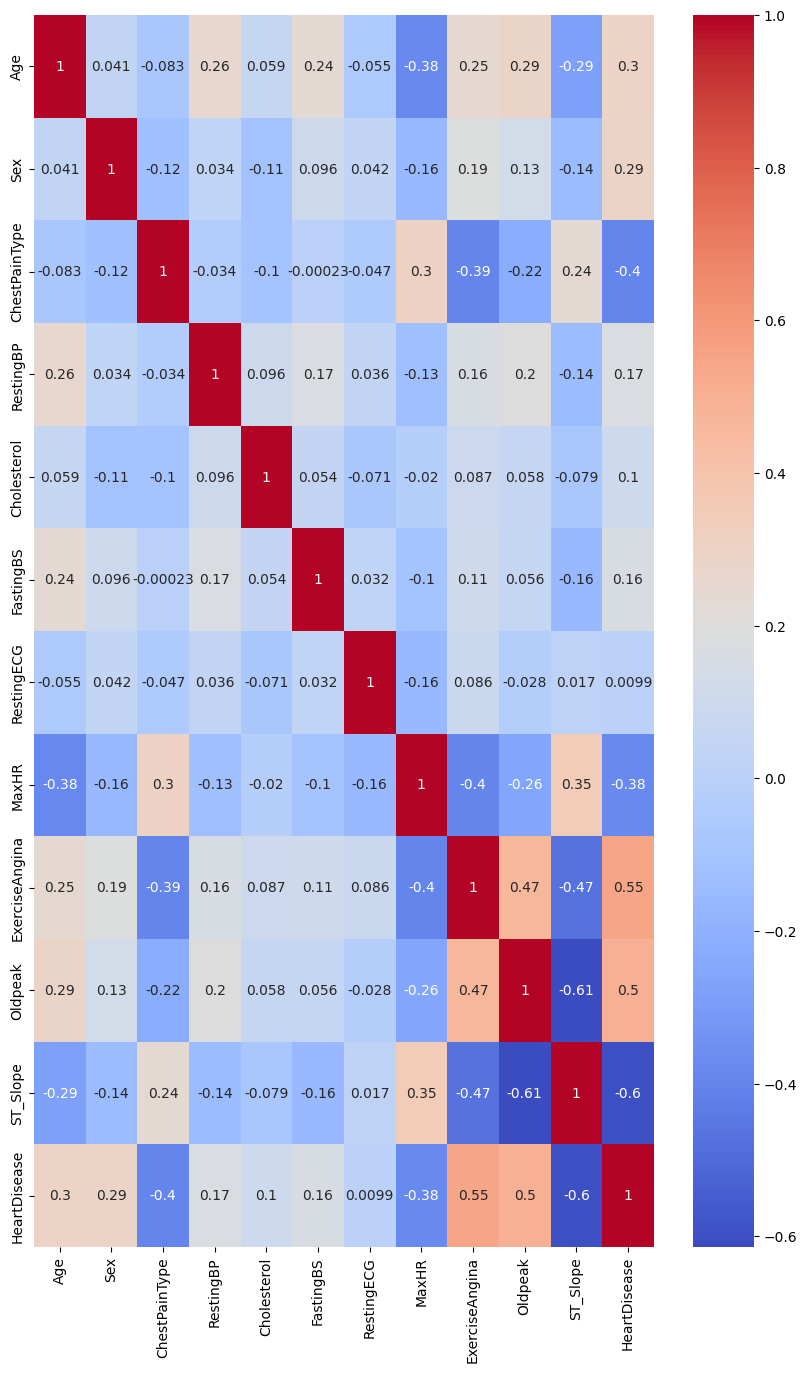

In [103]:
#%pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

label_encoder = LabelEncoder()
analysis_data['Sex'] = label_encoder.fit_transform(analysis_data['Sex'])
analysis_data['ChestPainType'] = label_encoder.fit_transform(analysis_data['ChestPainType'])
analysis_data['RestingECG'] = label_encoder.fit_transform(analysis_data['RestingECG'])
analysis_data['ExerciseAngina'] = label_encoder.fit_transform(analysis_data['ExerciseAngina'])
analysis_data['ST_Slope'] = label_encoder.fit_transform(analysis_data['ST_Slope'])

correlation_matrix = analysis_data.corr()

pyplot.figure(figsize=(10,16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

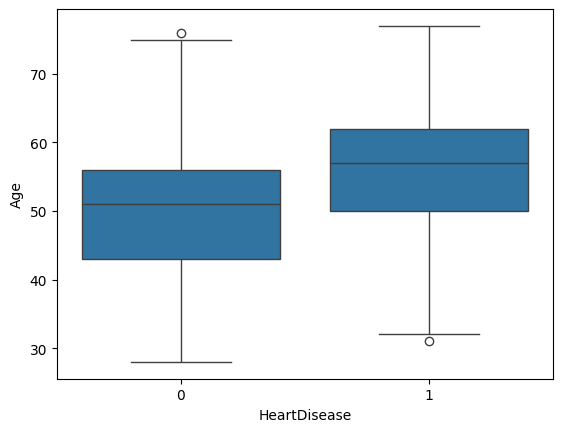

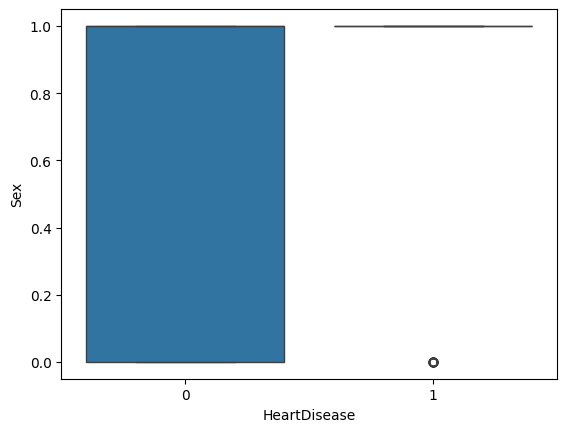

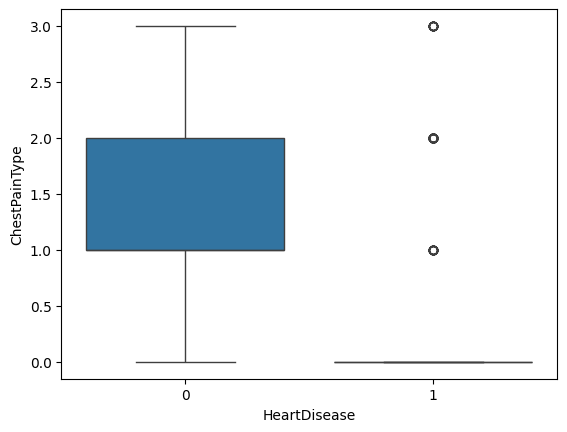

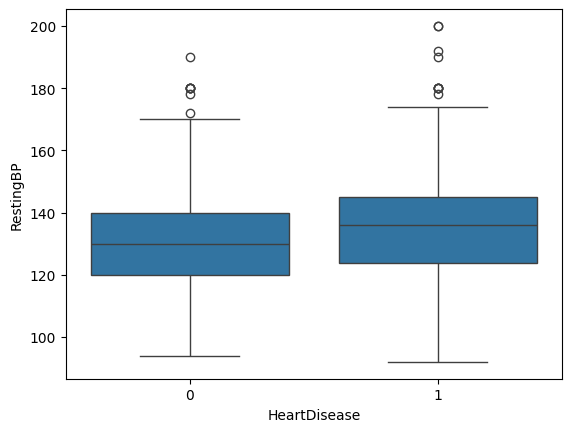

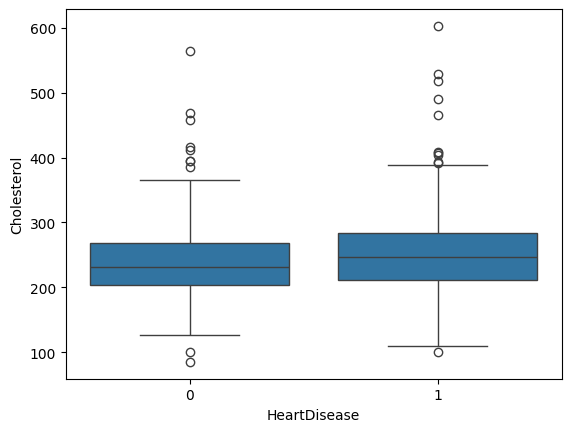

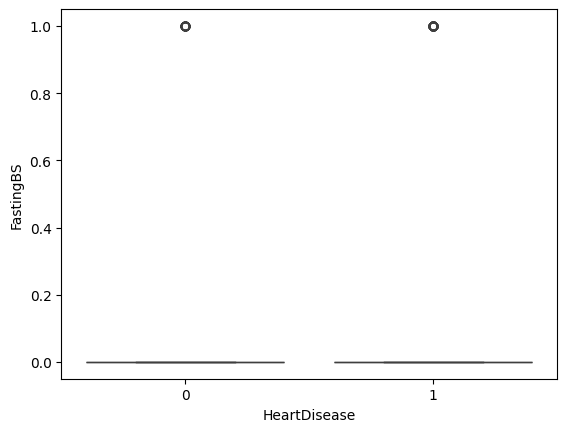

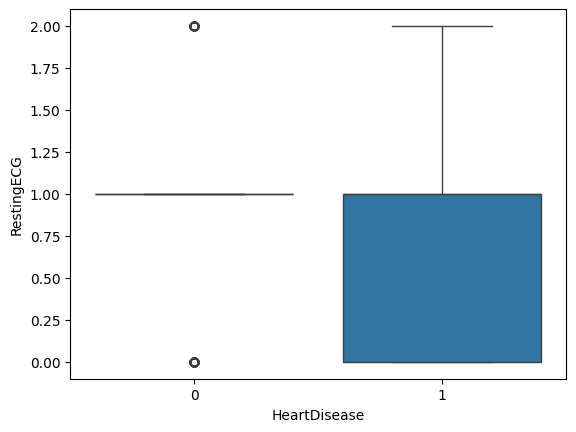

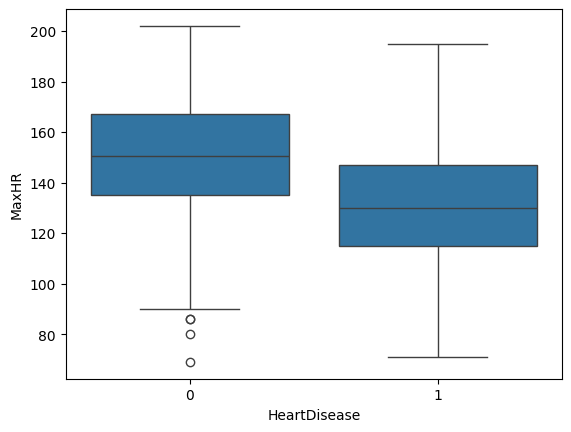

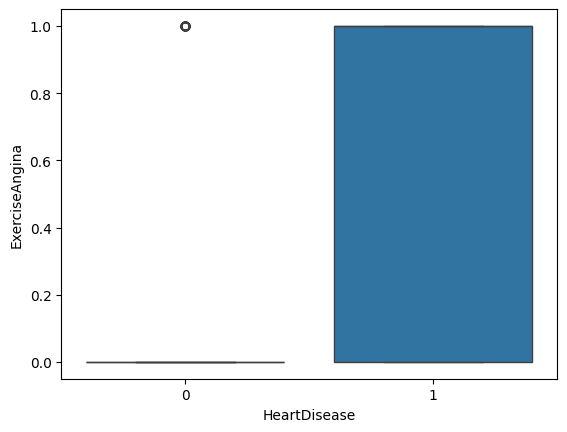

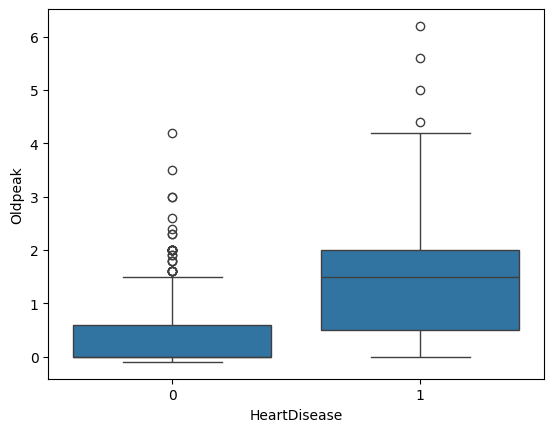

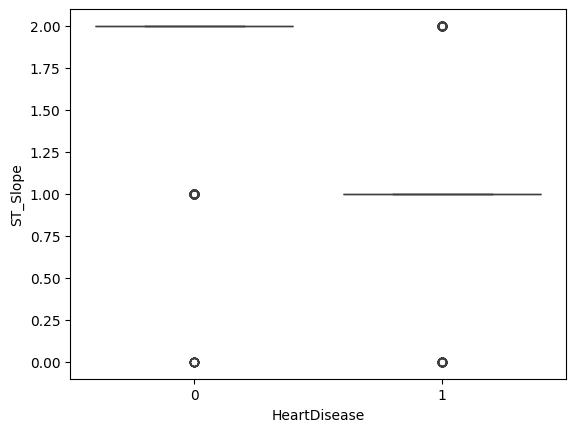

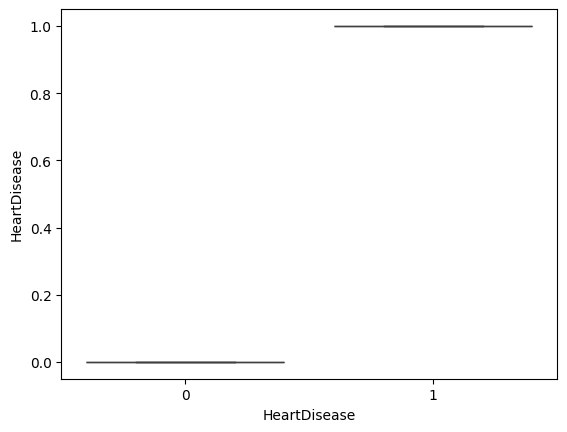

In [104]:
for column in data.columns:
    if analysis_data[column].dtype != 'object':
        sns.boxplot(x='HeartDisease', y=column, data=analysis_data)
        plt.show()

In [105]:
for column in analysis_data.columns:
    if analysis_data[column].dtype == 'object':
        sns.countplot(x=column, hue='HeartDisease', data=analysis_data)
        plt.show()

Po eksporacyjnej analizie danych, na podstawie macierzy korelacji, kolumny `RestingECG` oraz `Cholesterol` zostają usunięte i nie będą brane pod uwagę podczas tworzenia sieci neuronowej, ze względu na bardzo niską korelację ze zmienną celu.

In [106]:
X = data.drop(columns=['RestingECG', 'HeartDisease', 'Cholesterol'])
y = data['HeartDisease']
X2 = X.copy()
y2 = y.copy()
X

,Age,Sex,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,0,172,N,0.0,Up
1,49,F,NAP,160,0,156,N,1.0,Flat
2,37,M,ATA,130,0,98,N,0.0,Up
3,48,F,ASY,138,0,108,Y,1.5,Flat
4,54,M,NAP,150,0,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...
741,45,M,TA,110,0,132,N,1.2,Flat
742,68,M,ASY,144,1,141,N,3.4,Flat
743,57,M,ASY,130,0,115,Y,1.2,Flat
744,57,F,ATA,130,0,174,N,0.0,Flat


Utworzenie zbiorów testowego i uczącego z podziałem 30% danych testowych, 70% uczących.

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=AVG_ID_SUM, stratify=y)


Utworzenie dwóch selektorów, wybierająchych zmienne numeryczne i kategoryczne.

In [108]:
from sklearn.compose import make_column_selector
sel_num = make_column_selector(dtype_include=['int64', 'float64'])
sel_cat = make_column_selector(dtype_include='object')

In [109]:
sel_num(X)

['Age', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak']

In [110]:
sel_cat(X)

['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']

Przy użyciu `ColumnTransformer`, w jednym kroku dokonywana jest transformacja na dwóch typach zmiennych - numerycznych i kategorycznych.

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

preprocesor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), sel_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), sel_cat)
    ]
)

Przy użyciu `Pipeline` tworzona jest "lista kroków" jaka ma się wykonać, w tym przypadku, najpierw z wyżej utworzonego procesora przekształcane są dane, a nastepnie przy użyciu `MLPClassifier` tworzy się klasyfikator oparty na sieci neuronowej.

Parametr `max_iter=250`, został dostosowany ze względu na dość mały zbiór oraz "nieprzeuczającą" się sieć. <br>
Parametr `learning_rate='adaptive'` został dobrany, ze względu na dynamiczne dostosowywanie współcznika uczenia, co we współpracy, ze zwiększoną `max_iter`, znajduje równowagę między najeefektywniejszym nauczeniem sieci, tak by jej nie przeuczyć.

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(random_state=AVG_ID_SUM, max_iter=250, learning_rate='adaptive')
potok = Pipeline(
    steps=[
        ('prep', preprocesor),
        ('siec', mlp_classifier)
    ]
)

To polecenie, najpierw przekształca zbiór uczący, a nastepnie odbywa się "uczenie" sieci neuronowej.

In [113]:
potok.fit(X_train, y_train)

/home/dominik/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1dd8db54d0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f1dd8b17810>)])),
                ('siec',
                 MLPClassifier(learning_rate='adaptive', max_iter=250,
                               random_state=308197))])

Opis sieci:
1. Sieć składa się z 3 wartstw, warstwy wejściowej, jednej ukrytej i wyjściowej.
2. Liczba neuronów w warstwie wejściowej wynosi 16, ponieważ jest 5 zmiennych numerycznych, oraz 4 kategoryczne `['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']` gdzie przy powyżej użytytego `OneHotEncodera`, aby można ich było użyc w sieci neuronowej zostały podzielone poszczególnie na:<br>
a) `Sex` dzieli się na 2 zmienne, ponieważ ta zmienna zawierała dwie wartości.<br>
b) `ChestPainType` dzieli się na 4 zmienne, ponieważ ta zmienna zawierała cztery wartości.<br>
c) `ExerciseAngina` dzieli się na 2 zmienne, ponieważ ta zmienna zawierała dwie wartości.<br>
d) `ST_Slope` dzieli się na 3 zmienne, ponieważ ta zmienna zawierała trzy wartości.<br>
3. Domyślną liczbę neuronów w wartstwie ukrytej.<br>
4. Jest to funkcja aktywacji, która aktywuje neuron.<br>
5. Sieć ma jedną jednostkę w warstwie wyjściowej, ponieważ jest to klasyfikacja binarna.<br>
6. Jest to funkcja sigmoidalna, która przekształca wynik na zakres [0, 1]. Została użyta, ponieważ sieć rozwiązuje problem klasyfikacji binarnej.

In [114]:
def network_informatiok(potok, krok):
    print('Liczba warstw: ', potok.named_steps[krok].n_layers_)
    print('Liczba neuronów w warstwie wejściowej: ', potok.named_steps[krok].n_features_in_)
    print('Liczba neuronów w warstwach ukrytych: ', potok.named_steps[krok].hidden_layer_sizes)
    print('Funkcja aktywacji w warstwach ukrytych : ', potok.named_steps[krok].activation)
    print('Liczba neuronów w warstwie wyjściowej: ', potok.named_steps[krok].n_outputs_)
    print('Funkcja aktywacji w warstwie wyjściowej : ', potok.named_steps[krok].out_activation_)

network_informatiok(potok, 'siec')

Liczba warstw:  3
Liczba neuronów w warstwie wejściowej:  16
Liczba neuronów w warstwach ukrytych:  (100,)
Funkcja aktywacji w warstwach ukrytych :  relu
Liczba neuronów w warstwie wyjściowej:  1
Funkcja aktywacji w warstwie wyjściowej :  logistic


Pogląd na macierz pomyłek dla obydwu zbiorów.

In [115]:
from sklearn.metrics import confusion_matrix
y_train_pred = potok.predict(X_train)
y_test_pred = potok.predict(X_test)
print('Macierz pomyłek, zbiór testowy:\n')
display(pd.DataFrame(confusion_matrix(y_test, y_test_pred)))
print('Macierz pomyłek, zbiór uczący:\n')
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))

Macierz pomyłek, zbiór testowy:



,0,1
0,105,12
1,10,97


Macierz pomyłek, zbiór uczący:



,0,1
0,242,31
1,26,223


In [116]:
def evaluate_classification_model(y_true, y_pred, digits = 2):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    overall_error_rate = 1 - accuracy
    sensitivity = tp/(fn+tp)
    fnr = fn/(fn+tp)
    specificity = tn/(tn+fp)
    fpr = fp/(tn+fp)
    precision = tp/(fp+tp)
    f1 = (2 * sensitivity * precision) / (sensitivity + precision)
    print('Trafność: ', round(accuracy, digits))
    print('Całkowity współczynnik błędu', round(overall_error_rate, digits))
    print('Czułość: ', round(sensitivity, digits))
    print('Wskaźnik fałszywie negatywnych: ', round(fnr, digits))
    print('Specyficzność: ', round(specificity, digits))
    print('Wskaźnik fałszywie pozytywnych: ', round(fpr, digits))
    print('Precyzja: ', round(precision, digits))
    print('Wynik F1: ', round(f1, digits))

Patrząc na naiwny model, według którego każdy pacjent miałby choroby sercowe, co daje 50% trafności, sieć neuronowa jest zdecydowanie lepsza. <br>
Analiza sieci dla danych testowych: <br>
1. `Trafność` - wynosi aż 90%, co oznacza, że sieć dla pozytywnych i negatywnych przypadków, na 90% będzie zwróci poprawną odpowiedź.
2. `Czułość` - 91% świadczy, że taka jest szansa na poprawną identyfikacje pacjenta rzeczywiście chorego.
3. `Specyficzność` - 90% świadczy, że taka jest szansa na poprawną identyfikacje pacjenta niechorującego na serce.
4. `Precyzja` na poziomie 89%, mówi o poprawnie zidentyfikowanych pozytywnych przypadków w porównaniu do wszystkich rzeczywistych pozytywnych przypadków.
5. `Współczynnik F1` - czyli średnia harmoniczna między precyzją a czułością na poziomie 90%, świadczy że sieć dobrze radzi sobię z false posiitives i false negatives.

In [117]:
print("Ocena modelu dla zbioru testowego:")
evaluate_classification_model(y_test, y_test_pred)

Ocena modelu dla zbioru testowego:
Trafność:  0.9
Całkowity współczynnik błędu 0.1
Czułość:  0.91
Wskaźnik fałszywie negatywnych:  0.09
Specyficzność:  0.9
Wskaźnik fałszywie pozytywnych:  0.1
Precyzja:  0.89
Wynik F1:  0.9


Można zauważyć ciekawą zależność, otóż sieć radzi sobie delikatnie lepiej na danych testowych niż na uczących może to być spowodowane, małym zbiorem uczącym. Sieć łatwo przystosowywuje się do danych, ale może mieć trudność w generalizacji na nowe dane. W tym przypadku, zbiór testowy może być bardziej reprezentatywny dla rzeczywistego rozkładu danych, co pozwala na lepszą generalizację i w rezultacie lepsze wyniki.

In [118]:
print("Ocena modelu dla zbioru uczącego:")
evaluate_classification_model(y_train, y_train_pred)

Ocena modelu dla zbioru uczącego:
Trafność:  0.89
Całkowity współczynnik błędu 0.11
Czułość:  0.9
Wskaźnik fałszywie negatywnych:  0.1
Specyficzność:  0.89
Wskaźnik fałszywie pozytywnych:  0.11
Precyzja:  0.88
Wynik F1:  0.89


Pole pod roc dla zbioru testowego : 0.956
Pole pod roc dla zbioru uczącego : 0.955


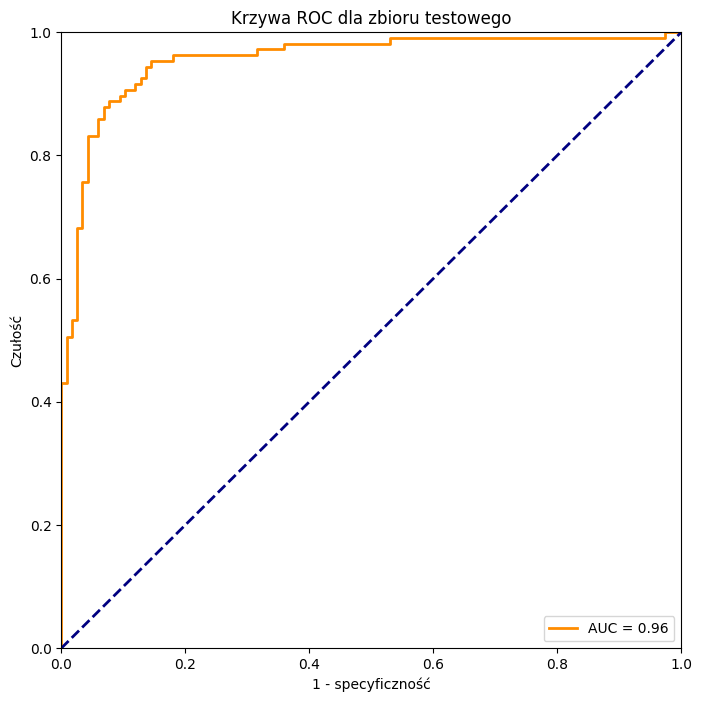

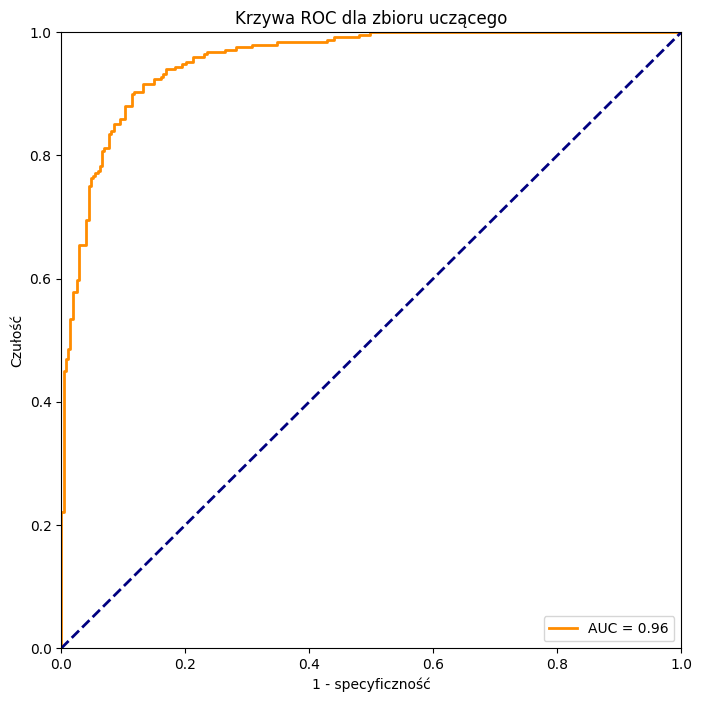

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
def ROC(y_true, y_score, roc_title=''):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - specyficzność')
    plt.ylabel('Czułość')
    plt.title(roc_title)
    plt.legend(loc="lower right")

y_train_score = potok.predict_proba(X_train)[:,1]
y_test_score = potok.predict_proba(X_test)[:,1]

ROC(y_test, y_test_score, "Krzywa ROC dla zbioru testowego")
ROC(y_train, y_train_score, "Krzywa ROC dla zbioru uczącego")
auc_test = roc_auc_score(y_test, y_test_score)
auc_train = roc_auc_score(y_train, y_train_score)
print('Pole pod roc dla zbioru testowego : %.3f' % auc_test)
print('Pole pod roc dla zbioru uczącego : %.3f' % auc_train)

In [120]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=AVG_ID_SUM, stratify=y)


Używając danych przygotowanych wcześniej do metody MLP, tworzymy dokładnie takie same dwa zestawy danych, jedne uczące, drugie testowe.
Użyjemy je do modelu klasyfikującego CART.

In [121]:
X_train2

,Age,Sex,ChestPainType,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
545,49,F,ASY,130,0,163,N,0.0,Up
76,32,M,ASY,118,0,130,N,0.0,Flat
344,63,M,ASY,160,1,88,Y,2.0,Flat
493,42,M,ASY,136,0,125,Y,1.8,Flat
387,64,M,ASY,134,0,102,Y,4.0,Down
...,...,...,...,...,...,...,...,...,...
502,62,M,ATA,120,0,103,N,1.4,Flat
337,51,M,ASY,132,1,138,N,0.2,Up
581,34,F,ATA,118,0,192,N,0.7,Up
18,60,M,ASY,100,0,125,N,1.0,Flat


In [122]:
y_train2

545    0
76     1
344    1
493    1
387    1
      ..
502    1
337    0
581    0
18     1
22     0
Name: HeartDisease, Length: 522, dtype: int64

In [123]:
from sklearn.preprocessing import OneHotEncoder
kolumny_kat = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']
kat_enc = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore').set_output(transform = 'pandas')

X_train = pd.concat([X_train2.drop(columns=kolumny_kat),
                     kat_enc.fit_transform(X_train2[kolumny_kat])
                     ], axis= 1)
X_test = pd.concat([X_test2.drop(columns=kolumny_kat),
                     kat_enc.fit_transform(X_test2[kolumny_kat])
                     ], axis= 1)

In [124]:
X_train

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
545,49,130,0,163,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
76,32,118,0,130,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
344,63,160,1,88,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
493,42,136,0,125,1.8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
387,64,134,0,102,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,62,120,0,103,1.4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
337,51,132,1,138,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
581,34,118,0,192,0.7,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
18,60,100,0,125,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [125]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=AVG_ID_SUM)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=308197)

Tworzymy drzewo z domyślnymi wartościami.

In [126]:
y_train_pred = tree1.predict(X_train)
y_test_pred = tree1.predict(X_test)

Wyznaczami przewidywane wartości zmiennej celu.

In [127]:
print('Zbiór uczący\n')
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
print('\nZbiór testowy\n')
display(pd.DataFrame(confusion_matrix(y_test, y_test_pred)))

Zbiór uczący



,0,1
0,273,0
1,0,249



Zbiór testowy



,0,1
0,96,21
1,16,91


Widać, że na zbiorze uczącym algorytm nie popełnił prawie żadnych błędów, nie działa on za to tak dobrze na zbiorze testowym.

In [128]:
from sklearn.metrics import accuracy_score
print('Zbiór uczący : ', accuracy_score(y_train, y_train_pred))
print('Zbiór testowy: ', accuracy_score(y_test, y_test_pred))

Zbiór uczący :  1.0
Zbiór testowy:  0.8348214285714286


Różnica wynośi prawie 17 punktów procentowych. Może to być spowodowane przeuczeniem klasyfikatora. Nie zastosowaliśmy ograniczeń na wzrost drzewa przez co prawdopodobnie się ono rozrosło.
Sprawdzamy wielkość drzewa:

In [129]:
def tree_size(drzewo):
    print('Liczba wszystkich węzłów: ', drzewo.tree_.node_count)
    print('Liczba liści: ', drzewo.get_n_leaves())
    print('Głębokość: ', drzewo.get_depth())

tree_size(tree1)

Liczba wszystkich węzłów:  183
Liczba liści:  92
Głębokość:  14


Rozrosło się ono do prawie 200 węzłów i 14 poziomów.
Ograniczmy rozrost drzewa, wykorzystująć parametry min_samples_split i max_depth.

In [130]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'max_depth' : range(1,20), 'min_samples_split' : [2, 10, 20, 50]}
best_tree = GridSearchCV(DecisionTreeClassifier(random_state = 0), hyperparameters, n_jobs = -1)
best_tree.fit(X_train, y_train)
best_tree.best_params_

{'max_depth': 1, 'min_samples_split': 2}

Optymalna głębokość naszego drzewa wynosi 1 oraz to że wezły z mniej niż 2 obserwacjami nie powinny być dzielone.

In [131]:
tree_size(best_tree.best_estimator_)

Liczba wszystkich węzłów:  3
Liczba liści:  2
Głębokość:  1


In [137]:
print('Zbiór uczący\n')
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
print('\nZbiór testowy\n')
display(pd.DataFrame(confusion_matrix(y_test, y_test_pred)))

Zbiór uczący



,0,1
0,211,62
1,30,219



Zbiór testowy



,0,1
0,93,24
1,15,92


Jak widać po ograniczeniu rozrostu drzewa witają nas o wiele normalniejsze wyniki.

Sprawdzamy trafność kwalifikatora po ustawieniu zmiennych.

In [132]:
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)
print('Zbiór uczący : ', accuracy_score(y_train, y_train_pred))
print('Zbiór testowy: ', accuracy_score(y_test, y_test_pred))

Zbiór uczący :  0.8237547892720306
Zbiór testowy:  0.8258928571428571


Trafności są do siebie w tym momencie bardzo zblizone, możemy przejść do sprawdzania innych miar jakości.

In [133]:
def ocen_model_klasyfikacji_binarnej(y_true, y_pred, digits = 2):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    overall_error_rate = 1 - accuracy
    sensitivity = tp/(fn+tp)
    fnr = fn/(fn+tp)
    specificity = tn/(tn+fp)
    fpr = fp/(tn+fp)
    precision = tp/(fp+tp)
    f1 = (2 * sensitivity * precision) / (sensitivity + precision)
    print('Trafność: ', round(accuracy, digits))
    print('Całkowity współczynnik błędu', round(overall_error_rate, digits))
    print('Czułość: ', round(sensitivity, digits))
    print('Wskaźnik fałszywie negatywnych: ', round(fnr, digits))
    print('Specyficzność: ', round(specificity, digits))
    print('Wskaźnik fałszywie pozytywnych: ', round(fpr, digits))
    print('Precyzja: ', round(precision, digits))
    print('Wynik F1: ', round(f1, digits))

Patrząc na naiwny model, według którego każdy pacjent miałby choroby sercowe, co daje 50% trafności, trzewo Cart jest troche lepsze.
Jednak nie jest to idealne rozwiązanie
Analiza drzewa dla danych testowych: 
1. `Trafność` - wynosi około 83%, co oznacza, że dla pozytywnych i negatywnych przypadków, na 83% będzie zwróci poprawną odpowiedź.
2. `Czułość` - 86% świadczy, że taka jest szansa na poprawną identyfikacje pacjenta rzeczywiście chorego.
3. `Specyficzność` - 79% świadczy, że taka jest szansa na poprawną identyfikacje pacjenta niechorującego na serce.
4. `Precyzja` na poziomie 79%, mówi o poprawnie zidentyfikowanych pozytywnych przypadków w porównaniu do wszystkich rzeczywistych pozytywnych przypadków.
5. `Współczynnik F1` - czyli średnia harmoniczna między precyzją a czułością na poziomie 83%, świadczy że sieć dobrze radzi sobię z false posiitives i false negatives.

In [134]:
print('Zbiór uczący\n')
ocen_model_klasyfikacji_binarnej(y_train, y_train_pred)
print('\n')
print('Zbiór testowy\n')
ocen_model_klasyfikacji_binarnej(y_test, y_test_pred)

Zbiór uczący

Trafność:  0.82
Całkowity współczynnik błędu 0.18
Czułość:  0.88
Wskaźnik fałszywie negatywnych:  0.12
Specyficzność:  0.77
Wskaźnik fałszywie pozytywnych:  0.23
Precyzja:  0.78
Wynik F1:  0.83


Zbiór testowy

Trafność:  0.83
Całkowity współczynnik błędu 0.17
Czułość:  0.86
Wskaźnik fałszywie negatywnych:  0.14
Specyficzność:  0.79
Wskaźnik fałszywie pozytywnych:  0.21
Precyzja:  0.79
Wynik F1:  0.83


In [135]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
def ROC(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - specyficzność')
    plt.ylabel('Czułość')
    plt.title('Krzywa ROC')
    plt.legend(loc="lower right")

Pole pod roc dla zbioru testowego : 0.827
Pole pod roc dla zbioru uczącego : 0.826


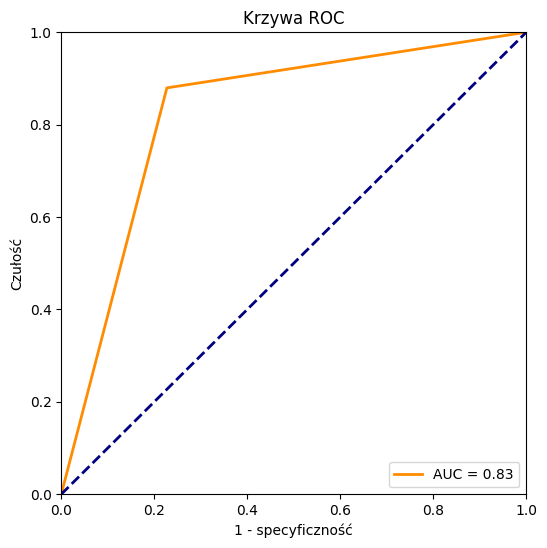

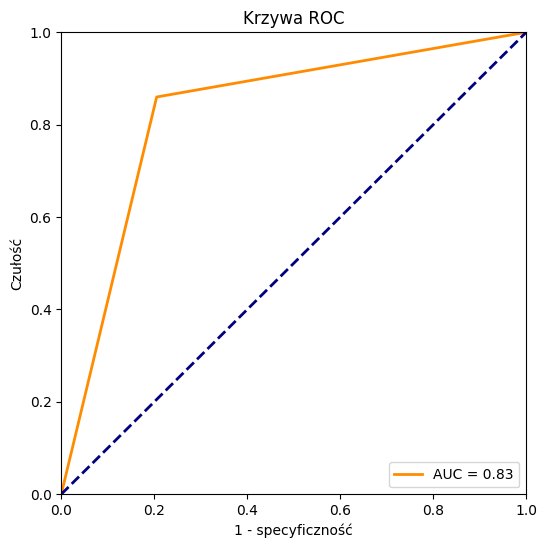

In [136]:
y_train_score = best_tree.predict_proba(X_train)[:,1]
y_test_score = best_tree.predict_proba(X_test)[:,1]
ROC(y_train, y_train_score)
ROC(y_test, y_test_score)

auc_test = roc_auc_score(y_test, y_test_score)
auc_train = roc_auc_score(y_train, y_train_score)
print('Pole pod roc dla zbioru testowego : %.3f' % auc_test)
print('Pole pod roc dla zbioru uczącego : %.3f' % auc_train)

Widać, że drzewo klasyfikacyjne-regresyjne jest lepsze od naiwnego algorytmu, jednak pozostawia w sobię wiele do życzenia. Zdecydowanie lepiej zastosować tutaj model MPL